In [1]:
import datetime
import json
import nltk
from datetime import time

In [2]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

keyword = "gift,app,buy,off,purchase,'T&C',available,join,participating"

# Tokenize
tokenizer=TweetTokenizer()
tokenized_keyword=tokenizer.tokenize(keyword)

# Stop word removal
stop_words = set(stopwords.words('english'))
stop_word_removed_keyword = []
for word in tokenized_keyword:
        if word not in stop_words: 
            stop_word_removed_keyword.append(word)

# Stemming
stemmer = PorterStemmer()
stemmed_keyword = []
for word in stop_word_removed_keyword:
    stemmed_keyword.append(stemmer.stem(word))

# Punctuation removal
punctuation=set(string.punctuation)
finalize_keyword = []
 
for word in stemmed_keyword:
    if word not in punctuation: 
        finalize_keyword.append(word)
        
print("Keyword After Process:", finalize_keyword)

Keyword After Process: ['gift', 'app', 'buy', 'purchas', 'T', 'C', 'avail', 'join', 'particip']


In [7]:
def advertismentCheck(text) :
    tokenized_text=tokenizer.tokenize(text)
    stop_word_removed_text = []
    advertisement = False
    for word in tokenized_text:
        if word not in stop_words: 
            stop_word_removed_text.append(word)
    stemmed_text = []
    for word in stop_word_removed_text:
        stemmed_text.append(stemmer.stem(word))
    punc_remove_text = []
    for word in stemmed_text:
        if word not in punctuation: 
            punc_remove_text.append(word)
    for word in punc_remove_text:
        if word in finalize_keyword: 
            advertisement = True
    return advertisement

In [8]:
import sys
import json

overalladvertisement=0
overallinformative=0

if __name__ == '__main__':
    screen_name = "TheCoffeeBean" #note: if the user_timeline.json file does not exist, run getuserTimeline
    fname = 'output/users/{}/user_timeline_final.json'.format(screen_name)
  
    with open(fname) as f1:
        tweet,favorite_count1, retweet_count1 = [], [], []
        f_count = 0
        r_count = 0
        total = 0
        for line in f1:
            total += 1
            tweet = json.loads(line)
            f_count += tweet['favorite_count']
            r_count += tweet['retweet_count']
            if(advertismentCheck(tweet['text'])==True):
                overalladvertisement+=1
            else:
                overallinformative+=1
    print('number of tweets:',total)
    print('average favorite count:',round(f_count/total,3))
    print('average retweet count:',round(r_count/total,3))
    print('ratio (retweet:favorite) = {}:{}'.format(1,round((f_count/total)/(r_count/total),5)))
    print('Ratio Of Advertisement and Informative: ', round((overalladvertisement/total),2), "," ,round((overallinformative/total),2))

number of tweets: 58
average favorite count: 12.517
average retweet count: 1.621
ratio (retweet:favorite) = 1:7.7234
Ratio Of Advertisement and Informative:  0.12 , 0.88


In [10]:
import datetime
import time

screen_name = "TheCoffeeBean" #note: if the user_timeline.json file does not exist, run getuserTimeline
fname = 'output/users/{}/user_timeline_noduplicate.json'.format(screen_name)

format_time = '%d/%m/%Y %H:%M'

AdvmidnightEn = 0
AdvmorningEn = 0
AdvnoonEn=0
AdvnightEn=0

InfmidnightEn = 0
InfmorningEn = 0
InfnoonEn=0
InfnightEn=0

with open(fname) as f1:
    for line in f1:
        info1 = json.loads(line)
        currentTime = datetime.datetime.strptime(info1['created_at'],format_time)
        if(advertismentCheck(info1['text'])==True):
            if(currentTime.time()>=datetime.time(0,0,0) and currentTime.time()<=datetime.time(5,59,0)):
                AdvmidnightEn = AdvmidnightEn + int(info1['retweet_count']) +int(info1['favorite_count']) 

            elif(currentTime.time()>=datetime.time(6,0,0) and currentTime.time()<=datetime.time(11,59,0)):
                AdvmorningEn = AdvmorningEn + int(info1['retweet_count']) +int(info1['favorite_count'])

            elif(currentTime.time()>=datetime.time(12,0,0) and currentTime.time()<=datetime.time(17,59,0)):
                AdvnoonEn = AdvnoonEn + int(info1['retweet_count']) +int(info1['favorite_count']) 

            elif(currentTime.time()>=datetime.time(18,0,0) and currentTime.time()<=datetime.time(23,59,0)):
                AdvnightEn = AdvnightEn + int(info1['retweet_count']) +int(info1['favorite_count']) 

        else:

            if(currentTime.time()>=datetime.time(0,0,0) and currentTime.time()<=datetime.time(5,59,0)):
                InfmidnightEn = InfmidnightEn + int(info1['retweet_count']) +int(info1['favorite_count']) 

            elif(currentTime.time()>=datetime.time(6,0,0) and currentTime.time()<=datetime.time(11,59,0)):
                InfmorningEn = InfmorningEn + int(info1['retweet_count']) +int(info1['favorite_count']) 

            elif(currentTime.time()>=datetime.time(12,0,0) and currentTime.time()<=datetime.time(17,59,0)):
                InfnoonEn = InfnoonEn + int(info1['retweet_count']) +int(info1['favorite_count']) 

            elif(currentTime.time()>=datetime.time(18,0,0) and currentTime.time()<=datetime.time(23,59,0)):
                InfnightEn = InfnightEn + int(info1['retweet_count']) +int(info1['favorite_count']) 


In [11]:
print(AdvmidnightEn)
print(AdvmorningEn)
print(AdvnoonEn)
print(AdvnightEn)

0
0
96
52


In [12]:
print(InfmidnightEn)
print(InfmorningEn)
print(InfnoonEn)
print(InfnightEn)

32
1
515
124


In [26]:
screen_name='TheCoffeeBean'
fname = 'output/users/{}/user_timeline_final.json'.format(screen_name)

num = sum(1 for line in open(fname))
    
weekday = datetime.timedelta(days=6)
oneday = datetime.timedelta(days=1)


format_str = '%d/%m/%Y'
startDate=''

ADvsIF=[]

informative=0
advertisment=0
counter=0
avgInfRtNFav = []
avgAdvRtNFav = []
totalEngagement = []
totalEngagementAdv = []
totalEngagementInf = []
AdvertisementRtNFav = []
InformativeRtNFav = []
postPer2Weeks = []
typeRatio = []
advertisementRetweet=0
advertisementFavourite=0
informativeRetweet=0
informativeFavourite=0
week=0
total=0

with open(fname) as f1:
    for line in f1:
        info1 = json.loads(line)
        currentDate = datetime.datetime.strptime(info1['created_at'].split()[0],format_str)
        if(startDate==''):
            startDate = currentDate 
            endDate = currentDate+weekday
        if(currentDate <= endDate):
            counter=counter+1
            total +=1
     

            if(advertismentCheck(info1['text'])==True):
                advertisment=advertisment+1
                advertisementRetweet=advertisementRetweet+int(info1['retweet_count'])
                advertisementFavourite=advertisementFavourite+int(info1['favorite_count'])
            else:
                informative=informative+1
                informativeRetweet=informativeRetweet+int(info1['retweet_count'])
                informativeFavourite=informativeFavourite+int(info1['favorite_count'])
          
            if (total == num-4):
                ADvsIF.append((advertisment, informative))
                totalEngagement.append((advertisementRetweet+advertisementFavourite+informativeRetweet+informativeFavourite))
                totalEngagementAdv.append((advertisementRetweet+advertisementFavourite))
                totalEngagementInf.append((informativeRetweet+informativeFavourite))
                AdvertisementRtNFav.append((advertisementRetweet+advertisementFavourite))
                InformativeRtNFav.append((informativeRetweet+informativeFavourite))
                avgAdvRtNFav.append((round((advertisementRetweet/counter),2), round((advertisementFavourite/counter),2)))
                avgInfRtNFav.append((round((informativeRetweet/counter),2), round((informativeFavourite/counter),2)))
                postPer2Weeks.append(counter)
                typeRatio.append((round((advertisment/(advertisment+informative )),2),round((informative/(advertisment+informative )),2)))

                
        else:
            startDate=endDate
            startDate = startDate + oneday
            week += 1
            endDate = startDate+weekday
        
            ADvsIF.append((advertisment, informative))
            totalEngagement.append((advertisementRetweet+advertisementFavourite+informativeRetweet+informativeFavourite))
            totalEngagementAdv.append((advertisementRetweet+advertisementFavourite))
            totalEngagementInf.append((informativeRetweet+informativeFavourite))
            AdvertisementRtNFav.append((advertisementRetweet+advertisementFavourite))
            InformativeRtNFav.append((informativeRetweet+informativeFavourite))
            avgAdvRtNFav.append((round((advertisementRetweet/counter),2), round((advertisementFavourite/counter),2)))
            avgInfRtNFav.append((round((informativeRetweet/counter),2), round((informativeFavourite/counter),2)))
            postPer2Weeks.append(counter)
            typeRatio.append((round((advertisment/(advertisment+informative )),2),round((informative/(advertisment+informative )),2)))

            informative=0
            advertisment=0
            counter=0
            advertisementRetweet=0
            advertisementFavourite=0
            advertisementReply=0
            informativeRetweet=0
            informativeFavourite=0
            informativeReply=0
            if(advertismentCheck(info1['text'])==True):
                advertisment=advertisment+1
                advertisementRetweet=advertisementRetweet+int(info1['retweet_count'])
                advertisementFavourite=advertisementFavourite+int(info1['favorite_count'])
            else:
                informative=informative+1
                informativeRetweet=informativeRetweet+int(info1['retweet_count'])
                informativeFavourite=informativeFavourite+int(info1['favorite_count'])
    print('done')

done


In [27]:
print(ADvsIF)
print(typeRatio)
print (totalEngagement)
print (totalEngagementAdv)
print (totalEngagementInf)
print(postPer2Weeks)

[(2, 13), (2, 8), (2, 13), (1, 7), (0, 10)]
[(0.13, 0.87), (0.2, 0.8), (0.13, 0.87), (0.12, 0.88), (0.0, 1.0)]
[267, 86, 204, 111, 152]
[59, 31, 52, 6, 0]
[208, 55, 152, 105, 152]
[15, 9, 14, 7, 9]


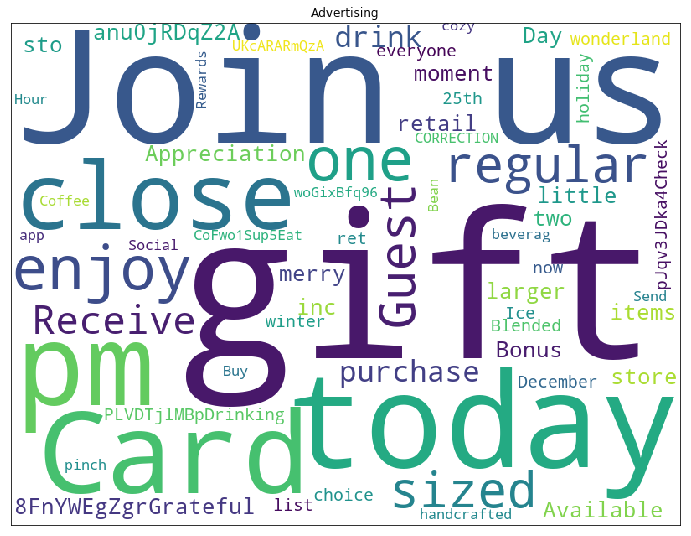

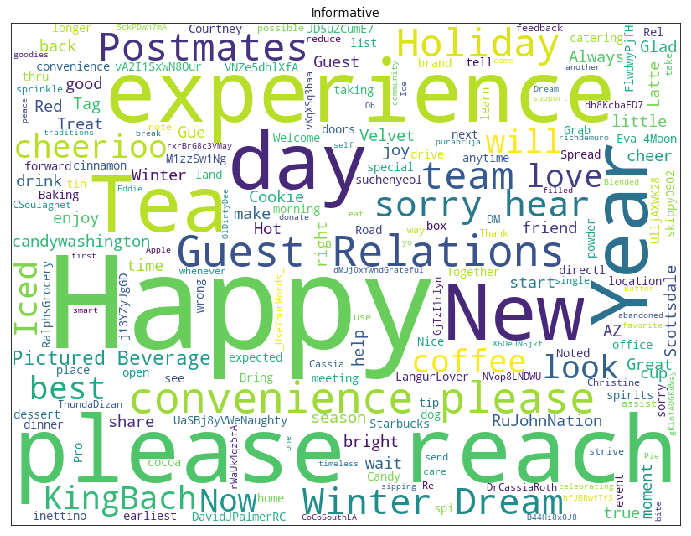

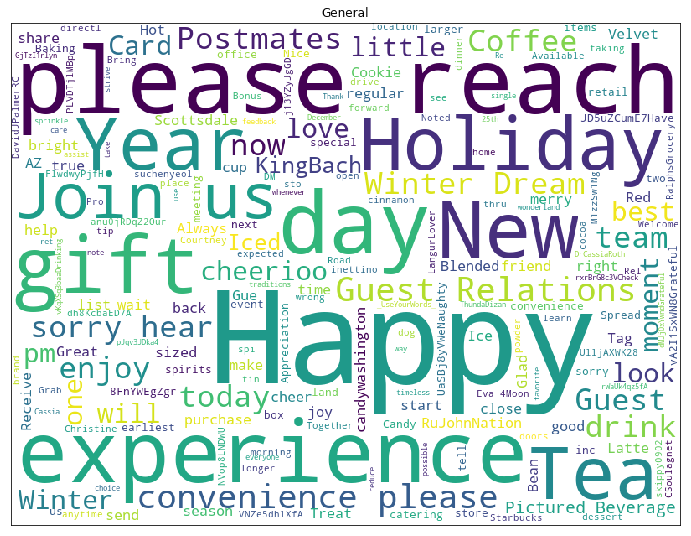

In [29]:
import sys
import string
import json
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

format_str = '%d/%m/%Y'
informativeWord=""
advertismentWord=""
general=''

screen_name='TheCoffeeBean'
fname = 'output/users/{}/user_timeline_final.json'.format(screen_name)
with open(fname, 'r',encoding="utf-8") as f1:
    for line in f1:
        info1 = json.loads(line)
        general= general + info1['text']
        if(advertismentCheck(info1['text'])==False):
            informativeWord=informativeWord+info1['text']
        else:
            advertismentWord=advertismentWord+info1['text']

stopwords = set(STOPWORDS)
stopwords.add('co')
stopwords.add('https')

wordcloudadv = WordCloud(stopwords=stopwords, background_color='white', width=800, height=600).generate(advertismentWord)
wordcloudinf = WordCloud(stopwords=stopwords, background_color='white', width=800, height=600).generate(informativeWord)
wordcloudgen = WordCloud(stopwords=stopwords, background_color='white', width=800, height=600).generate(general)

fig=plt.figure(figsize=(12,12))   
plt.title("Advertising")
plt.imshow(wordcloudadv), plt.xticks([]), plt.yticks([])
plt.savefig('cb_adv.png')
plt.show()

fig=plt.figure(figsize=(12,12))
plt.title("Informative")
plt.imshow(wordcloudinf), plt.xticks([]), plt.yticks([])
plt.savefig('cb_inf.png')
plt.show()

fig=plt.figure(figsize=(12,12))
plt.title("General")
plt.imshow(wordcloudgen), plt.xticks([]), plt.yticks([])
plt.savefig('cb_gen.png')
plt.show()

-0.07316235852932404 %


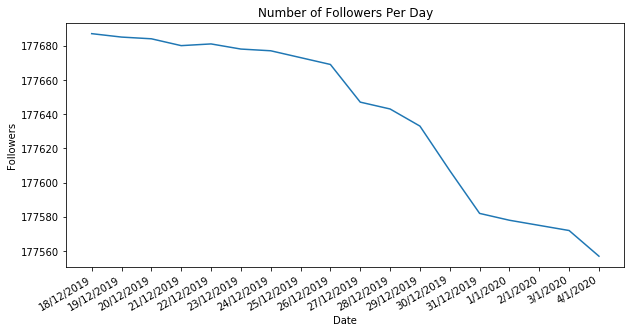

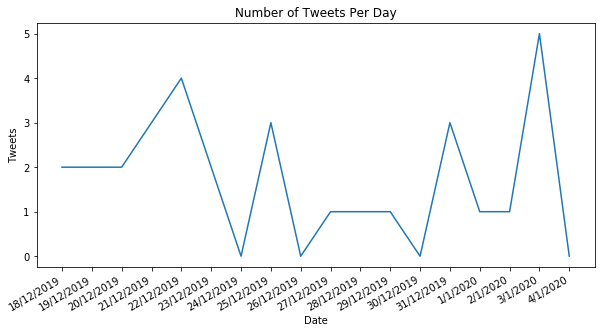

In [2]:
import json
import datetime
import matplotlib.pyplot as plt 

screen_name='TheCoffeeBean'
fname = 'output/users/{}/user_timeline_final_from18.json'.format(screen_name)

day=18
oneday = datetime.timedelta(days=1)
format_str = '%d/%m/%Y'
startDate=''
counter=0
total=[]
start= 0
end= 0

with open(fname) as f1:
    for line in f1:
        info1 = json.loads(line)
        currentDate = datetime.datetime.strptime(info1['created_at'].split()[0],format_str)
        if(currentDate.day==day):
            counter += 1
        else:
            if(day==31):
                nextday=1
            else:
                nextday= day+1
            if(currentDate.day != nextday):
                total.append(counter)
                total.append(0)
                day+=2
            else:
                total.append(counter)
                if (day<31):
                    day+=1
                else:
                    day=1
            counter=1


import json
Y = []
X = []

#dateformat='%Y-%m-%d'
with open("output/users/TheCoffeeBean/fnf_counts.json",'r') as f1:
    c = 0
    for line in f1:
        s = json.loads(line)
        for everyline in s:
            Y.append(int(s['Followers']))
            X.append(s['Date'])
            break

    
plt.figure(figsize=(10,5))
x=X
y=Y
start=y[0]
end= y[-1]
print (((end-start)/start)*100,'%')
plt.plot(x, y) 
plt.xlabel('Date') 
plt.ylabel('Followers')
plt.title('Number of Followers Per Day') 
plt.gcf().autofmt_xdate()
plt.savefig('cb_follower_per_day.png')
plt.show() 

plt.figure(figsize=(10,5))
plt.plot(x,total)  
plt.xlabel('Date') 
plt.ylabel('Tweets')  
plt.title('Number of Tweets Per Day') 
plt.gcf().autofmt_xdate()
#plt.savefig('cb_tweets_per_day.png')
plt.show() 


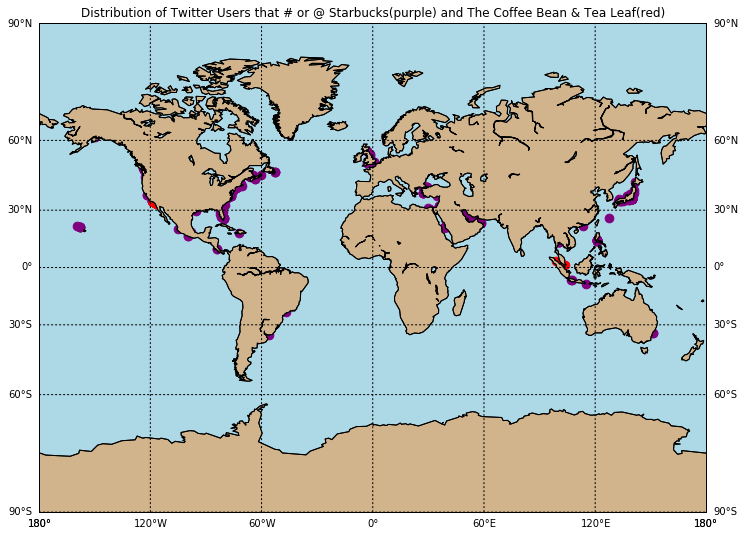

In [34]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt 
import numpy as np
import json

plt.figure(figsize=(12,9))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution='c')

m.drawcoastlines()
lon=[]
lat=[]
lon1=[]
lat1=[]

with open("output/users/Starbucks/geo.json",'r') as f1:
    
    for line in f1:
        json_data = json.loads(line)
        coords = json_data["coordinates"]
        if coords is not None:
            lat.append(coords["coordinates"][0])
            lon.append(coords["coordinates"][1])
with open("output/users/TheCoffeeBean/geo.json",'r') as f2:
    c = 0
    for line in f2:
        json_data = json.loads(line)
        coords = json_data["coordinates"]
        if coords is not None:
            lat1.append(coords["coordinates"][0])
            lon1.append(coords["coordinates"][1])

m.drawcoastlines()
m.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.),labels=[True,True,False,False],dashes=[2,2])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[False,False,False,True],dashes=[2,2])
m.drawmapboundary(fill_color='lightblue')            
m.scatter(lat,lon,latlon=True,c='purple',s=300,marker='.')
m.scatter(lat1,lon1,latlon=True,c='red',s=300,marker='.')
plt.title('Distribution of Twitter Users that # or @ Starbucks(purple) and The Coffee Bean & Tea Leaf(red)')
#plt.savefig('user_distribution.png')
plt.show()